In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [11]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date


('2017-08-23',)

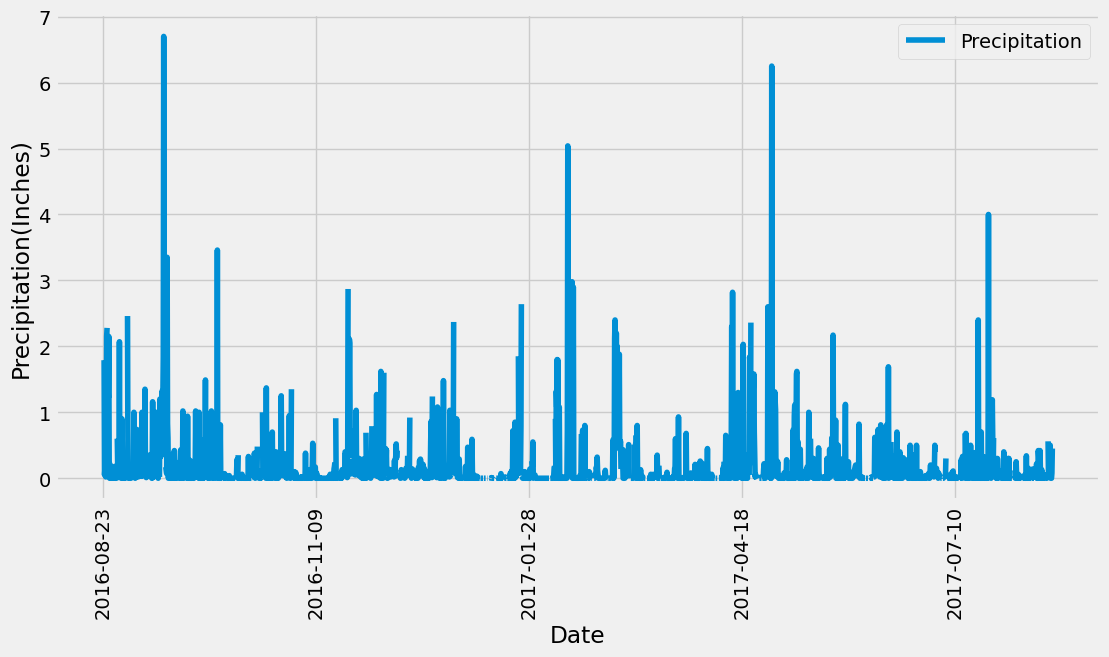

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
from_latest_date_year = latest_date - dt.timedelta(days=365)
from_latest_date_year

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ['Date', 'Precipitation'])


# Sort the dataframe by date
df_sorted = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.set_index('Date').plot(figsize = (12, 6))
plt.xticks(rotation = 90)
plt.ylabel('Precipitation(Inches)')
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(Measurement.station).distinct().count()
number_of_stations

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_info = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281')

print(f"""The Minimum Temprature of the station is {station_info[0][0]},
The Maximum Temprature of the station is {station_info[0][1]},
The Average Temperature of the station is {station_info[0][2]}""")

The Minimum Temprature of the station is 54.0,
The Maximum Temprature of the station is 85.0,
The Average Temperature of the station is 71.66378066378067


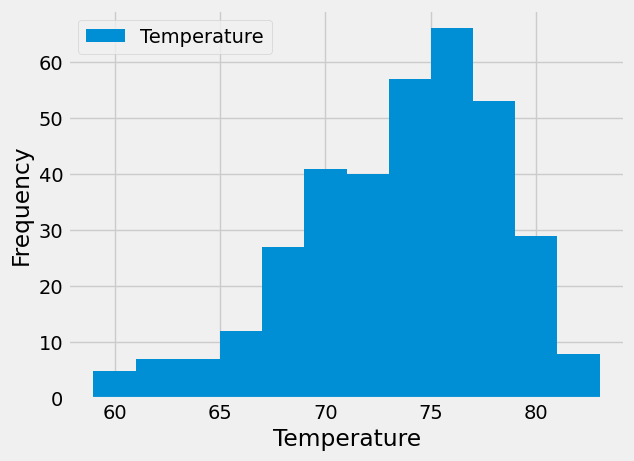

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-23')\
    .filter(Measurement.station == 'USC00519281').all()
#Plotting the histogram 
temprature_df = pd.DataFrame(station_data, columns = ['Date', 'Temperature'])
plt.hist(temprature_df['Temperature'],bins=12, label='Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

# Close Session

In [21]:
# Close Session
session.close()